In [491]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [492]:
train_data = pd.read_csv('train_val.data', header=None)
test_data = pd.read_csv('test.data', header=None)

X_train = train_data.iloc[:, 2:].values
y_train = train_data.iloc[:, 1].map({'M': 1, 'B': 0}).values
X_test = test_data.iloc[:, 2:].values
y_test = test_data.iloc[:, 1].map({'M': 1, 'B': 0}).values

In [493]:
display(train_data)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,859471,B,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
1,873593,M,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
2,859196,B,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
3,88466802,B,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
4,858970,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,859711,B,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
451,863031,B,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
452,8910721,B,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
453,908489,M,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [494]:
display(test_data)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,87930,B,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
1,859575,M,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
2,8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
3,907915,B,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
4,921385,B,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,913102,B,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,...,16.46,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596
110,8610404,M,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,...,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387
111,884689,B,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,...,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809
112,883270,B,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,...,15.75,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796


In [495]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       455 non-null    int64  
 1   1       455 non-null    object 
 2   2       455 non-null    float64
 3   3       455 non-null    float64
 4   4       455 non-null    float64
 5   5       455 non-null    float64
 6   6       455 non-null    float64
 7   7       455 non-null    float64
 8   8       455 non-null    float64
 9   9       455 non-null    float64
 10  10      455 non-null    float64
 11  11      455 non-null    float64
 12  12      455 non-null    float64
 13  13      455 non-null    float64
 14  14      455 non-null    float64
 15  15      455 non-null    float64
 16  16      455 non-null    float64
 17  17      455 non-null    float64
 18  18      455 non-null    float64
 19  19      455 non-null    float64
 20  20      455 non-null    float64
 21  21      455 non-null    float64
 22  22

In [496]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       114 non-null    int64  
 1   1       114 non-null    object 
 2   2       114 non-null    float64
 3   3       114 non-null    float64
 4   4       114 non-null    float64
 5   5       114 non-null    float64
 6   6       114 non-null    float64
 7   7       114 non-null    float64
 8   8       114 non-null    float64
 9   9       114 non-null    float64
 10  10      114 non-null    float64
 11  11      114 non-null    float64
 12  12      114 non-null    float64
 13  13      114 non-null    float64
 14  14      114 non-null    float64
 15  15      114 non-null    float64
 16  16      114 non-null    float64
 17  17      114 non-null    float64
 18  18      114 non-null    float64
 19  19      114 non-null    float64
 20  20      114 non-null    float64
 21  21      114 non-null    float64
 22  22

In [497]:
print(train_data.describe())

                 0           2           3           4            5   \
count  4.550000e+02  455.000000  455.000000  455.000000   455.000000   
mean   3.224856e+07   14.117635   19.185033   91.882242   654.377582   
std    1.325182e+08    3.535815    4.266005   24.322027   354.943187   
min    8.913000e+03    7.691000    9.710000   47.920000   170.400000   
25%    8.675630e+05   11.705000   16.170000   75.100000   420.300000   
50%    9.049710e+05   13.300000   18.680000   85.980000   551.700000   
75%    8.836916e+06   15.740000   21.585000  103.750000   767.600000   
max    9.113205e+08   28.110000   39.280000  188.500000  2501.000000   

               6           7           8           9           10  ...  \
count  455.000000  455.000000  455.000000  455.000000  455.000000  ...   
mean     0.095744    0.103619    0.088898    0.048280    0.181099  ...   
std      0.013923    0.052470    0.079468    0.038060    0.027487  ...   
min      0.052630    0.019380    0.000000    0.000000  

In [498]:
print(test_data.describe())

                 0           2           3           4            5   \
count  1.140000e+02  114.000000  114.000000  114.000000   114.000000   
mean   2.288138e+07   14.165833   19.707193   92.315439   656.930702   
std    8.910562e+07    3.491876    4.432655   24.310746   341.074645   
min    8.670000e+03    6.981000   10.940000   43.790000   143.500000   
25%    8.847538e+05   11.687500   16.217500   75.225000   418.625000   
50%    9.163780e+05   13.465000   19.535000   87.380000   548.700000   
75%    8.812265e+06   16.057500   22.675000  105.300000   806.800000   
max    9.113205e+08   25.220000   31.120000  171.500000  1878.000000   

               6           7           8           9           10  ...  \
count  114.000000  114.000000  114.000000  114.000000  114.000000  ...   
mean     0.098820    0.107221    0.088405    0.051471    0.181414  ...   
std      0.014415    0.054297    0.081070    0.041715    0.027240  ...   
min      0.068280    0.035580    0.000000    0.000000  

In [499]:
print("Missing values pada setiap kolom:")
print(train_data.isnull().sum())

Missing values pada setiap kolom:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64


In [500]:
print("Missing values pada setiap kolom:")
print(test_data.isnull().sum())

Missing values pada setiap kolom:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
dtype: int64


In [501]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

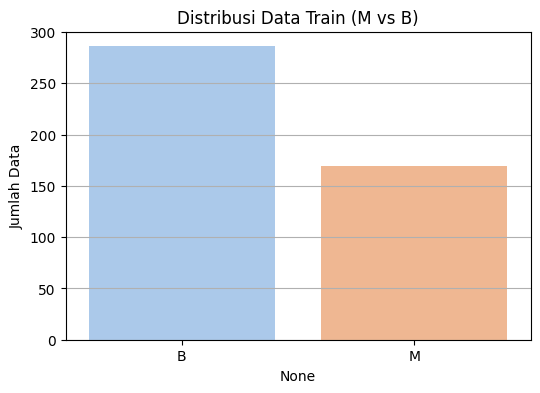

In [502]:
labels = pd.Series(y_train).map({1: 'M', 0: 'B'})

plt.figure(figsize=(6,4))
sns.countplot(x=labels, hue=labels, palette='pastel', legend=False)
plt.title('Distribusi Data Train (M vs B)')
plt.ylabel('Jumlah Data')
plt.grid(axis='y')
plt.show()

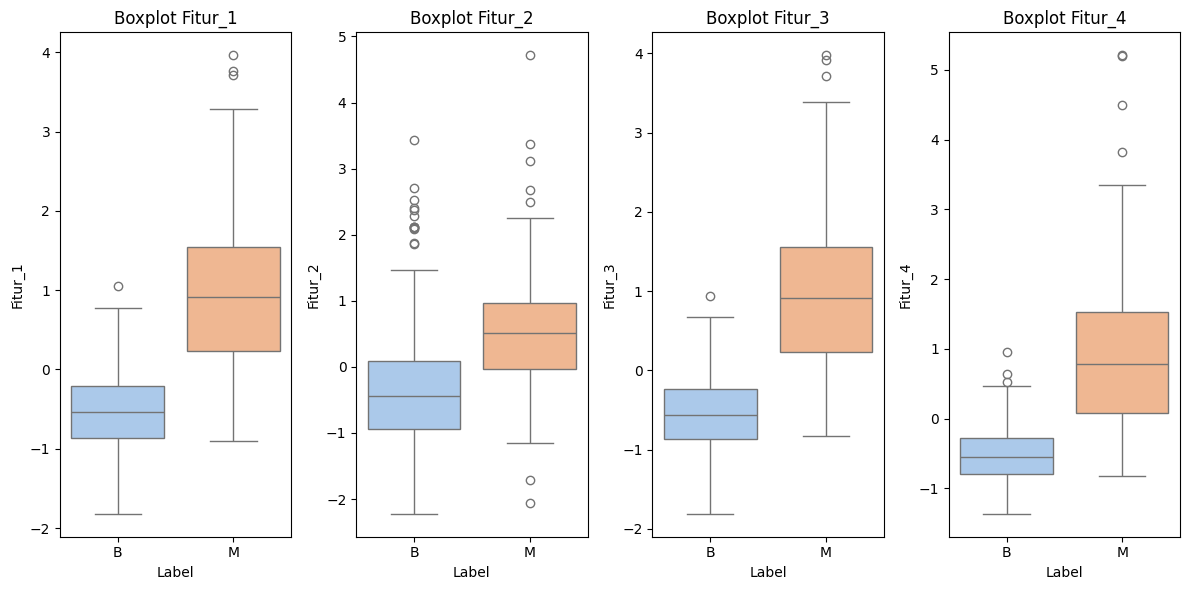

In [503]:
fitur_pilihan = ['Fitur_1', 'Fitur_2', 'Fitur_3', 'Fitur_4']
train_data_df = pd.DataFrame(X_train, columns=[f'Fitur_{i+1}' for i in range(X_train.shape[1])])
train_data_df['Label'] = labels

plt.figure(figsize=(12,6))
for i, f in enumerate(fitur_pilihan, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x='Label', y=f, hue=labels, data=train_data_df, palette='pastel', legend=False)
    plt.title(f'Boxplot {f}')
    plt.tight_layout()
plt.show()

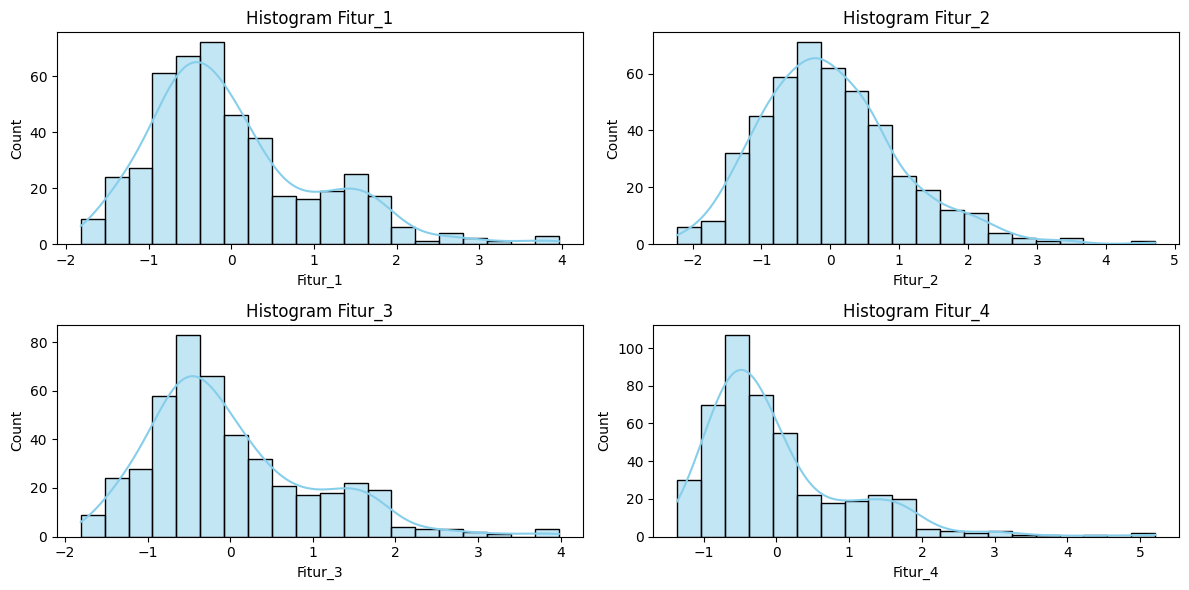

In [504]:
plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.histplot(train_data_df[f'Fitur_{i+1}'], bins=20, kde=True, color='skyblue')
    plt.title(f'Histogram Fitur_{i+1}')
plt.tight_layout()
plt.show()

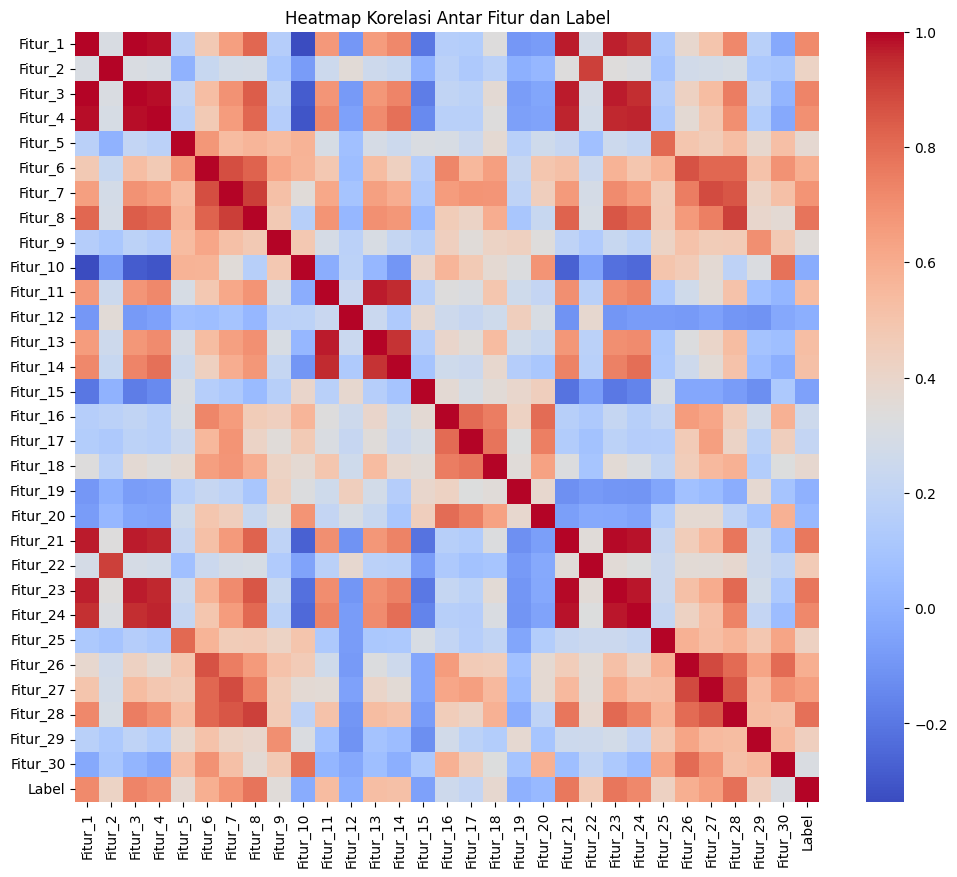

In [505]:
train_data_full = pd.DataFrame(X_train, columns=[f'Fitur_{i+1}' for i in range(X_train.shape[1])])
train_data_full['Label'] = y_train

plt.figure(figsize=(12,10))
sns.heatmap(train_data_full.corr(), cmap='coolwarm', annot=False)
plt.title('Heatmap Korelasi Antar Fitur dan Label')
plt.show()

In [506]:
def visualisasi_fitur_terpilih(X_data, fitur_mask, y_data, metode):
    fitur_terpilih = [f'Fitur_{i+1}' for i, v in enumerate(fitur_mask) if v]
    df = pd.DataFrame(X_data[:, fitur_mask], columns=fitur_terpilih)

    df['Label'] = y_data

    plt.figure(figsize=(3 * min(4, len(fitur_terpilih)), 4))
    for i, f in enumerate(fitur_terpilih[:4], 1):
        plt.subplot(1, min(4, len(fitur_terpilih)), i)
        sns.boxplot(x='Label', y=f, hue=labels, data=df, palette='pastel', legend=False)
        plt.title(f'Boxplot {f}')
    plt.suptitle(f'Boxplot Fitur Terpilih ({metode})')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(3 * min(4, len(fitur_terpilih)), 4))
    for i, f in enumerate(fitur_terpilih[:4], 1):
        plt.subplot(1, min(4, len(fitur_terpilih)), i)
        sns.histplot(df[f], bins=20, kde=True, color='skyblue')
        plt.title(f'Histogram {f}')
    plt.suptitle(f'Distribusi Data Fitur Terpilih ({metode})')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 8))
    corr = df.corr()
    sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True)
    plt.title(f'Heatmap Korelasi Fitur Terpilih ({metode})')
    plt.show()

##**GA + KNN dan PSO + KNN**

In [507]:
def fitness(individu, X, y, cv=5):
    fitur_mask = individu[:30] >= 0.5
    k = int(np.clip(individu[30], 3, 15))
    metric_val = individu[31]
    metric = 'euclidean' if metric_val < 0.5 else 'manhattan'

    if not np.any(fitur_mask):
        return 0

    X_sel = X[:, fitur_mask]
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    scores = cross_val_score(knn, X_sel, y, cv=cv, scoring='accuracy')
    return np.mean(scores)

def init_population(pop_size, dim):
    return [np.random.uniform(0, 1, dim) for _ in range(pop_size)]

def tournament_selection(population, fitnesses, k=3):
    selected = random.sample(list(zip(population, fitnesses)), k)
    selected.sort(key=lambda x: x[1], reverse=True)
    return selected[0][0]

def crossover(parent1, parent2):
    alpha = np.random.rand()
    child = alpha * parent1 + (1 - alpha) * parent2
    return child

def mutate(individu, mutation_rate=0.1):
    for i in range(len(individu)):
        if random.random() < mutation_rate:
            individu[i] += np.random.normal(0, 0.1)
            individu[i] = np.clip(individu[i], 0, 1)
    return individu

def genetic_algorithm(X, y, pop_size=30, generations=50):
    dim = 32
    population = init_population(pop_size, dim)
    akurasi_per_generasi = []

    for gen in range(generations):
        fitnesses = [fitness(ind, X, y) for ind in population]
        new_population = []
        for _ in range(pop_size):
            p1 = tournament_selection(population, fitnesses)
            p2 = tournament_selection(population, fitnesses)
            child = crossover(p1, p2)
            child = mutate(child)
            new_population.append(child)
        population = new_population
        best_fitness = max(fitnesses)
        akurasi_per_generasi.append(best_fitness)
        print(f'GA - Generasi {gen+1}, Akurasi Terbaik: {best_fitness:.4f}')

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, generations+1), akurasi_per_generasi, marker='o', color='blue', label='GA + KNN')
    plt.xlabel('Generasi')
    plt.ylabel('Akurasi KNN (Training)')
    plt.title('Perkembangan Akurasi GA + KNN')
    plt.grid(True)
    plt.legend()
    plt.show()

    fitnesses = [fitness(ind, X, y) for ind in population]
    best_index = np.argmax(fitnesses)
    return population[best_index]

In [508]:
def pso(X, y, num_particles=30, max_iter=50, w=0.5, c1=2, c2=0.5):
    dim = 32
    particles = [np.random.uniform(0, 1, dim) for _ in range(num_particles)]
    velocities = [np.zeros(dim) for _ in range(num_particles)]
    p_best = particles.copy()
    p_best_scores = [fitness(p, X, y) for p in p_best]
    g_best = p_best[np.argmax(p_best_scores)]
    akurasi_per_iterasi = []

    for iter in range(max_iter):
        for i in range(num_particles):
            r1, r2 = np.random.rand(), np.random.rand()
            velocities[i] = (
                w * velocities[i] +
                c1 * r1 * (p_best[i] - particles[i]) +
                c2 * r2 * (g_best - particles[i])
            )
            particles[i] += velocities[i]
            particles[i] = np.clip(particles[i], 0, 1)
            score = fitness(particles[i], X, y)
            if score > p_best_scores[i]:
                p_best[i] = particles[i]
                p_best_scores[i] = score
        g_best = p_best[np.argmax(p_best_scores)]
        best_score = max(p_best_scores)
        akurasi_per_iterasi.append(best_score)
        print(f'PSO - Iterasi {iter+1}, Akurasi Terbaik: {best_score:.4f}')

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_iter+1), akurasi_per_iterasi, marker='o', color='green', label='PSO + KNN')
    plt.xlabel('Iterasi')
    plt.ylabel('Akurasi KNN (Training)')
    plt.title('Perkembangan Akurasi PSO + KNN')
    plt.grid(True)
    plt.legend()
    plt.show()

    return g_best

Mencari fitur & hyperparameter optimal (GA + KNN)
GA - Generasi 1, Akurasi Terbaik: 0.9670
GA - Generasi 2, Akurasi Terbaik: 0.9692
GA - Generasi 3, Akurasi Terbaik: 0.9714
GA - Generasi 4, Akurasi Terbaik: 0.9714
GA - Generasi 5, Akurasi Terbaik: 0.9714
GA - Generasi 6, Akurasi Terbaik: 0.9692
GA - Generasi 7, Akurasi Terbaik: 0.9692
GA - Generasi 8, Akurasi Terbaik: 0.9736
GA - Generasi 9, Akurasi Terbaik: 0.9736
GA - Generasi 10, Akurasi Terbaik: 0.9736
GA - Generasi 11, Akurasi Terbaik: 0.9780
GA - Generasi 12, Akurasi Terbaik: 0.9736
GA - Generasi 13, Akurasi Terbaik: 0.9736
GA - Generasi 14, Akurasi Terbaik: 0.9736
GA - Generasi 15, Akurasi Terbaik: 0.9736
GA - Generasi 16, Akurasi Terbaik: 0.9736
GA - Generasi 17, Akurasi Terbaik: 0.9736
GA - Generasi 18, Akurasi Terbaik: 0.9736
GA - Generasi 19, Akurasi Terbaik: 0.9736
GA - Generasi 20, Akurasi Terbaik: 0.9736
GA - Generasi 21, Akurasi Terbaik: 0.9736
GA - Generasi 22, Akurasi Terbaik: 0.9736
GA - Generasi 23, Akurasi Terbaik: 

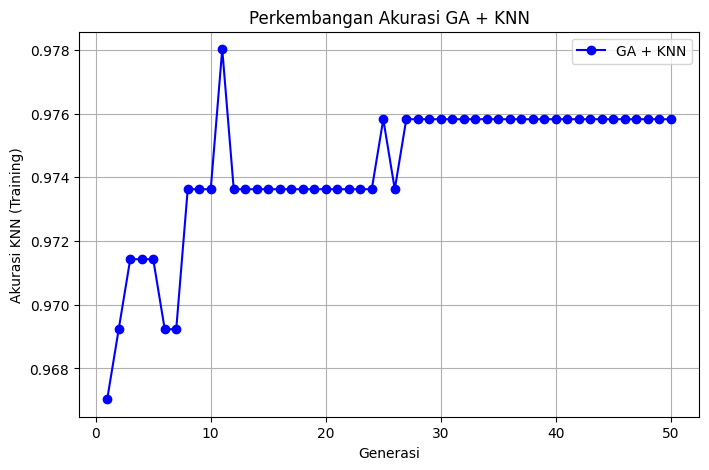


Mencari fitur & hyperparameter optimal (PSO + KNN)
PSO - Iterasi 1, Akurasi Terbaik: 0.9736
PSO - Iterasi 2, Akurasi Terbaik: 0.9736
PSO - Iterasi 3, Akurasi Terbaik: 0.9736
PSO - Iterasi 4, Akurasi Terbaik: 0.9736
PSO - Iterasi 5, Akurasi Terbaik: 0.9736
PSO - Iterasi 6, Akurasi Terbaik: 0.9736
PSO - Iterasi 7, Akurasi Terbaik: 0.9736
PSO - Iterasi 8, Akurasi Terbaik: 0.9736
PSO - Iterasi 9, Akurasi Terbaik: 0.9736
PSO - Iterasi 10, Akurasi Terbaik: 0.9736
PSO - Iterasi 11, Akurasi Terbaik: 0.9736
PSO - Iterasi 12, Akurasi Terbaik: 0.9736
PSO - Iterasi 13, Akurasi Terbaik: 0.9736
PSO - Iterasi 14, Akurasi Terbaik: 0.9736
PSO - Iterasi 15, Akurasi Terbaik: 0.9736
PSO - Iterasi 16, Akurasi Terbaik: 0.9736
PSO - Iterasi 17, Akurasi Terbaik: 0.9736
PSO - Iterasi 18, Akurasi Terbaik: 0.9736
PSO - Iterasi 19, Akurasi Terbaik: 0.9736
PSO - Iterasi 20, Akurasi Terbaik: 0.9736
PSO - Iterasi 21, Akurasi Terbaik: 0.9736
PSO - Iterasi 22, Akurasi Terbaik: 0.9758
PSO - Iterasi 23, Akurasi Terbaik

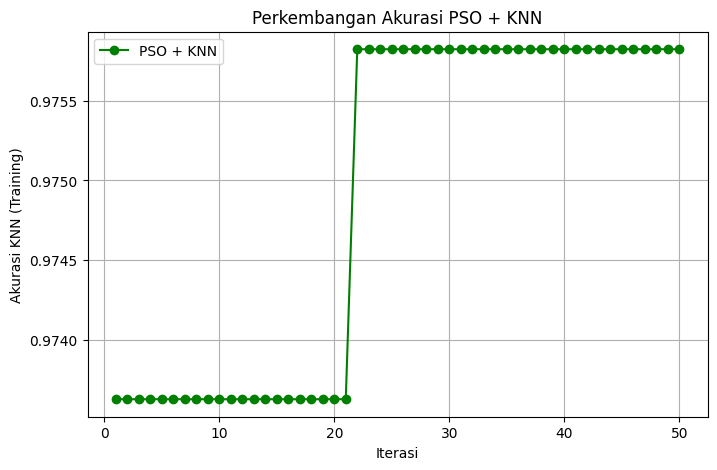

In [509]:
print("Mencari fitur & hyperparameter optimal (GA + KNN)")
best_ind_ga = genetic_algorithm(X_train, y_train)

print("\nMencari fitur & hyperparameter optimal (PSO + KNN)")
best_ind_pso = pso(X_train, y_train)

In [510]:
def interpretasi(individu, metode):
    fitur_mask = individu[:30] >= 0.5
    k_opt = int(np.clip(individu[30], 3, 15))
    metric_val = individu[31]
    metric = 'euclidean' if metric_val < 0.5 else 'manhattan'
    fitur_terpilih = np.where(fitur_mask)[0] + 1
    print(f"\n{metode}:")
    print(f"Fitur terpilih: {fitur_terpilih.tolist()}")
    print(f"Jumlah fitur: {len(fitur_terpilih)} dari 30")
    print(f"Hyperparameter k KNN: {k_opt}")
    print(f"Distance metric: {metric}")
    return fitur_mask, k_opt, metric

fitur_mask_ga, k_ga, metric_ga = interpretasi(best_ind_ga, "GA + KNN")
fitur_mask_pso, k_pso, metric_pso = interpretasi(best_ind_pso, "PSO + KNN")



GA + KNN:
Fitur terpilih: [1, 5, 8, 9, 12, 13, 15, 16, 17, 19, 21, 22, 24, 26]
Jumlah fitur: 14 dari 30
Hyperparameter k KNN: 3
Distance metric: manhattan

PSO + KNN:
Fitur terpilih: [1, 2, 3, 5, 8, 12, 13, 19, 20, 21, 23, 24, 25, 27, 30]
Jumlah fitur: 15 dari 30
Hyperparameter k KNN: 3
Distance metric: manhattan


Visualisasi Fitur Terpilih (GA)


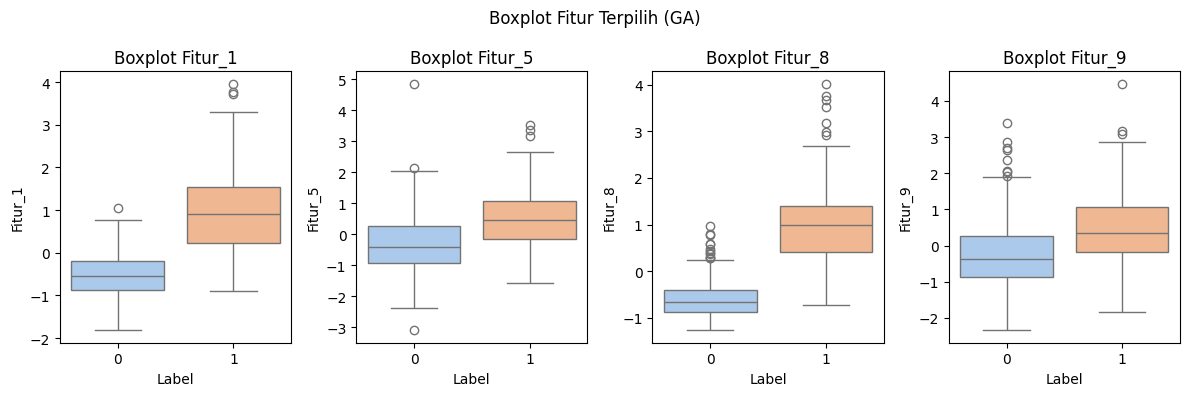

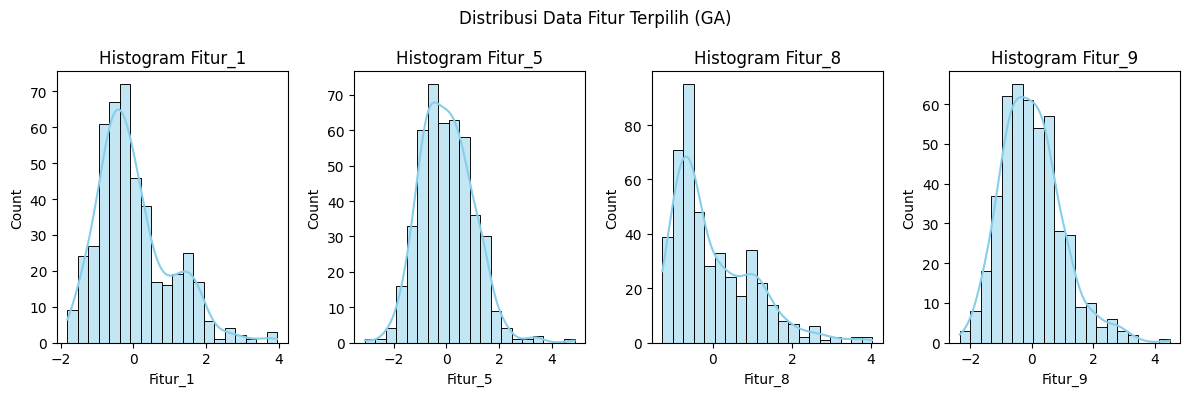

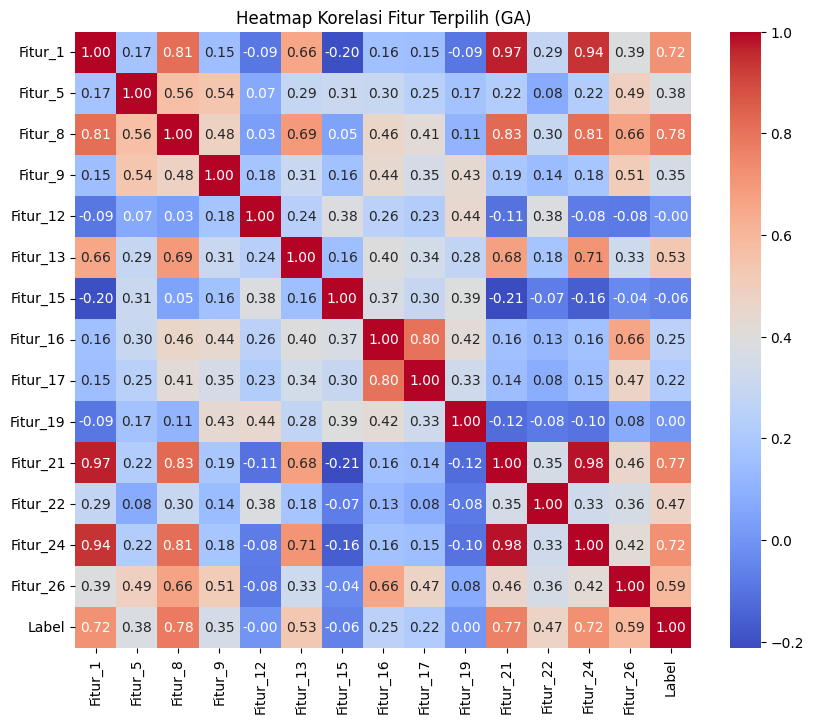

In [511]:
print("Visualisasi Fitur Terpilih (GA)")
visualisasi_fitur_terpilih(X_train, fitur_mask_ga, y_train, 'GA')


Visualisasi Fitur Terpilih (PSO)


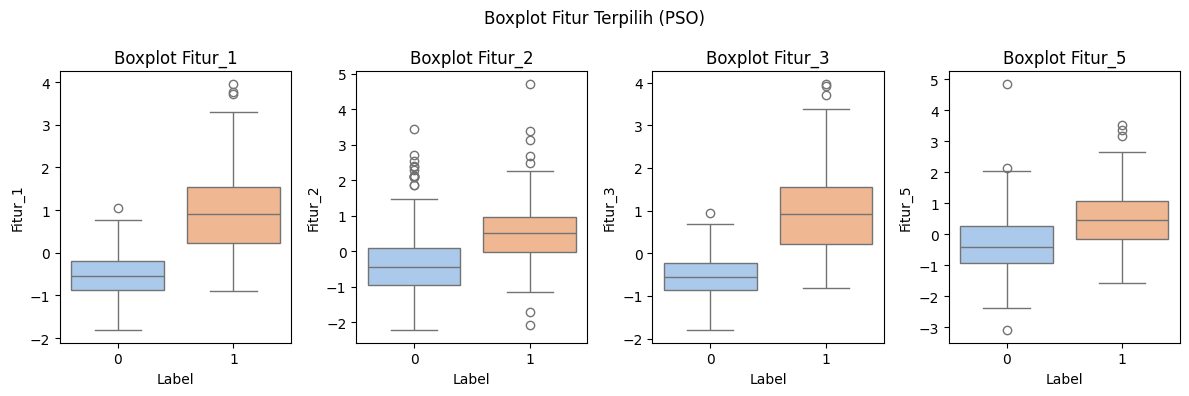

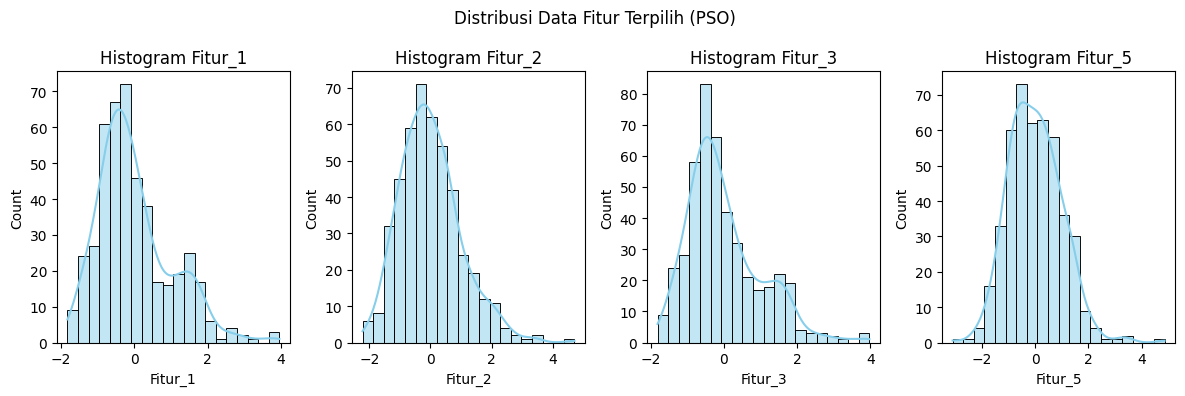

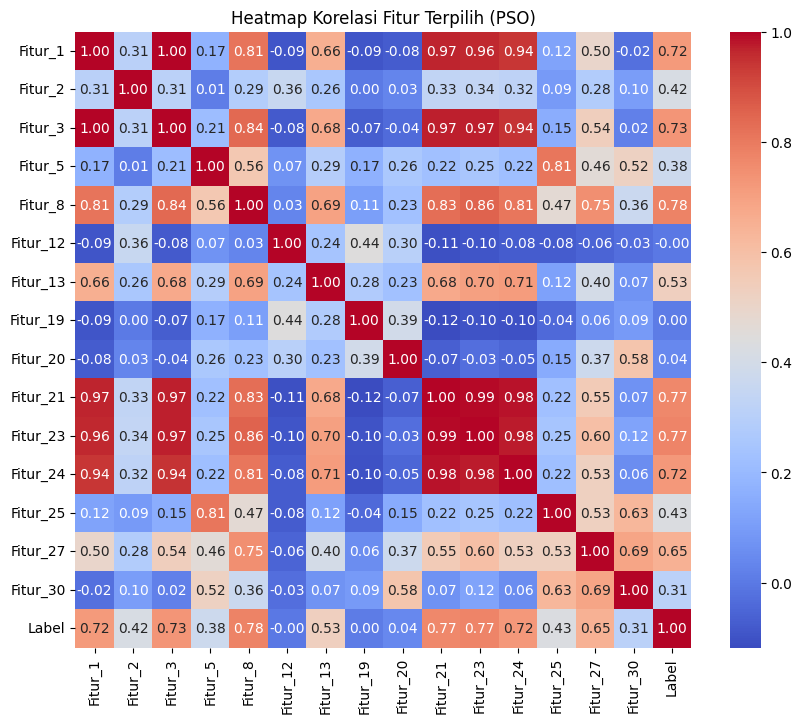

In [512]:
print("\nVisualisasi Fitur Terpilih (PSO)")
visualisasi_fitur_terpilih(X_train, fitur_mask_pso, y_train, 'PSO')

In [513]:
def evaluasi(X_train, y_train, X_test, y_test, fitur_mask, k, metric, metode):
    X_train_sel = X_train[:, fitur_mask]
    X_test_sel = X_test[:, fitur_mask]
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
    knn.fit(X_train_sel, y_train)
    y_pred = knn.predict(X_test_sel)
    akurasi = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return akurasi, precision, recall, f1

akurasi_ga, precision_ga, recall_ga, f1_ga = evaluasi(X_train, y_train, X_test, y_test, fitur_mask_ga, k_ga, metric_ga,"GA + KNN")

akurasi_pso, precision_pso, recall_pso, f1_pso = evaluasi(X_train, y_train, X_test, y_test, fitur_mask_pso, k_pso, metric_pso, "PSO + KNN")

print("Evaluasi GA + KNN")
print(f"Akurasi GA: {akurasi_ga:.4f}")
print(f"Presisi GA: {precision_ga:.4f}")
print(f"Recall GA: {recall_ga:.4f}")
print(f"F1-Score GA: {f1_ga:.4f}")

print("\nEvaluasi PSO + KNN")
print(f"Akurasi PSO: {akurasi_pso:.4f}")
print(f"Presisi PSO: {precision_pso:.4f}")
print(f"Recall PSO: {recall_pso:.4f}")
print(f"F1-Score PSO: {f1_pso:.4f}")

Evaluasi GA + KNN
Akurasi GA: 0.9561
Presisi GA: 0.9524
Recall GA: 0.9302
F1-Score GA: 0.9412

Evaluasi PSO + KNN
Akurasi PSO: 0.9737
Presisi PSO: 0.9762
Recall PSO: 0.9535
F1-Score PSO: 0.9647


##**GA + PSO + KNN**

In [514]:
def ga_feature_selection(X, y, pop_size=30, generations=50):
    dim = 30
    population = init_population(pop_size, dim)
    akurasi_per_generasi = []

    for gen in range(generations):
        fitnesses = []
        for ind in population:
            fitur_mask = ind >= 0.5
            if not np.any(fitur_mask):
                fitnesses.append(0)
                continue
            X_sel = X[:, fitur_mask]
            knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
            knn.fit(X_sel, y)
            y_pred = knn.predict(X_sel)
            fitnesses.append(accuracy_score(y, y_pred))
        new_population = []
        for _ in range(pop_size):
            p1 = tournament_selection(population, fitnesses)
            p2 = tournament_selection(population, fitnesses)
            child = crossover(p1, p2)
            child = mutate(child)
            new_population.append(child)
        population = new_population
        best_fitness = max(fitnesses)
        akurasi_per_generasi.append(best_fitness)
        print(f'GA-FS - Generasi {gen+1}, Akurasi Terbaik: {best_fitness:.4f}')

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, generations+1), akurasi_per_generasi, marker='o', color='purple', label='GA-FS')
    plt.xlabel('Generasi')
    plt.ylabel('Akurasi KNN (Training)')
    plt.title('Perkembangan Akurasi GA (Feature Selection)')
    plt.grid(True)
    plt.legend()
    plt.show()

    fitnesses = []
    for ind in population:
        fitur_mask = ind >= 0.5
        if not np.any(fitur_mask):
            fitnesses.append(0)
            continue
        X_sel = X[:, fitur_mask]
        knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
        knn.fit(X_sel, y)
        y_pred = knn.predict(X_sel)
        fitnesses.append(accuracy_score(y, y_pred))
    best_ind = population[np.argmax(fitnesses)]
    return best_ind

GA-FS - Generasi 1, Akurasi Terbaik: 0.9802
GA-FS - Generasi 2, Akurasi Terbaik: 0.9846
GA-FS - Generasi 3, Akurasi Terbaik: 0.9824
GA-FS - Generasi 4, Akurasi Terbaik: 0.9824
GA-FS - Generasi 5, Akurasi Terbaik: 0.9824
GA-FS - Generasi 6, Akurasi Terbaik: 0.9824
GA-FS - Generasi 7, Akurasi Terbaik: 0.9824
GA-FS - Generasi 8, Akurasi Terbaik: 0.9824
GA-FS - Generasi 9, Akurasi Terbaik: 0.9846
GA-FS - Generasi 10, Akurasi Terbaik: 0.9824
GA-FS - Generasi 11, Akurasi Terbaik: 0.9846
GA-FS - Generasi 12, Akurasi Terbaik: 0.9824
GA-FS - Generasi 13, Akurasi Terbaik: 0.9824
GA-FS - Generasi 14, Akurasi Terbaik: 0.9824
GA-FS - Generasi 15, Akurasi Terbaik: 0.9846
GA-FS - Generasi 16, Akurasi Terbaik: 0.9846
GA-FS - Generasi 17, Akurasi Terbaik: 0.9846
GA-FS - Generasi 18, Akurasi Terbaik: 0.9846
GA-FS - Generasi 19, Akurasi Terbaik: 0.9846
GA-FS - Generasi 20, Akurasi Terbaik: 0.9846
GA-FS - Generasi 21, Akurasi Terbaik: 0.9846
GA-FS - Generasi 22, Akurasi Terbaik: 0.9846
GA-FS - Generasi 23

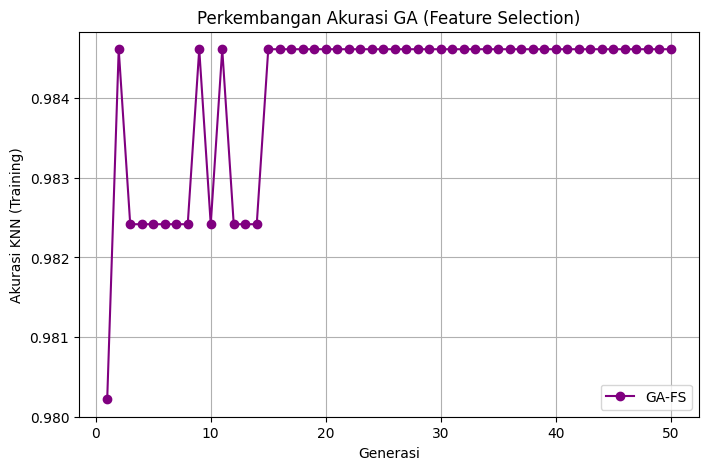


GA (Feature Selection) - Fitur terpilih: [2, 3, 5, 6, 7, 8, 9, 13, 15, 17, 18, 19, 21, 22, 23, 24, 26, 29] (18 fitur)


In [515]:
best_fitur_ind = ga_feature_selection(X_train, y_train)
fitur_mask_final = best_fitur_ind >= 0.5
fitur_terpilih_final = np.where(fitur_mask_final)[0] + 1
print(f"\nGA (Feature Selection) - Fitur terpilih: {fitur_terpilih_final.tolist()} ({len(fitur_terpilih_final)} fitur)")


Visualisasi Fitur Terpilih (GA(FS))


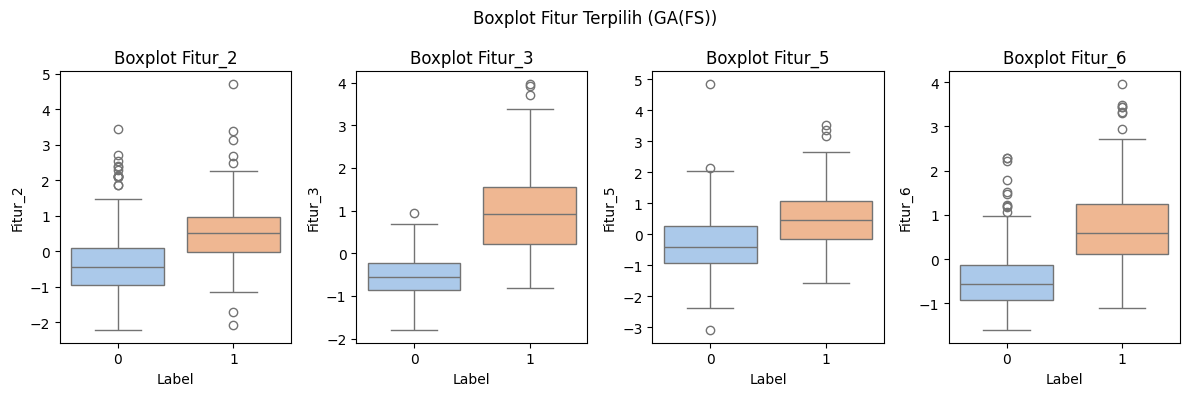

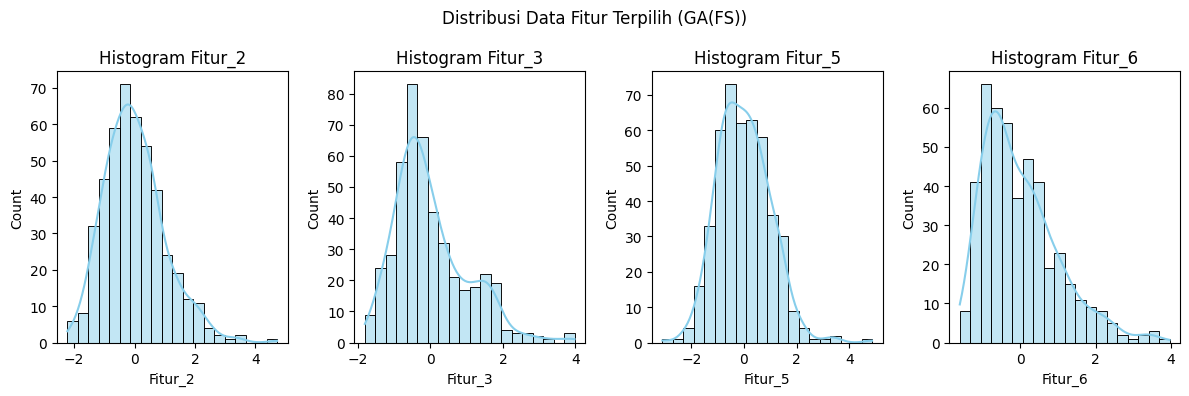

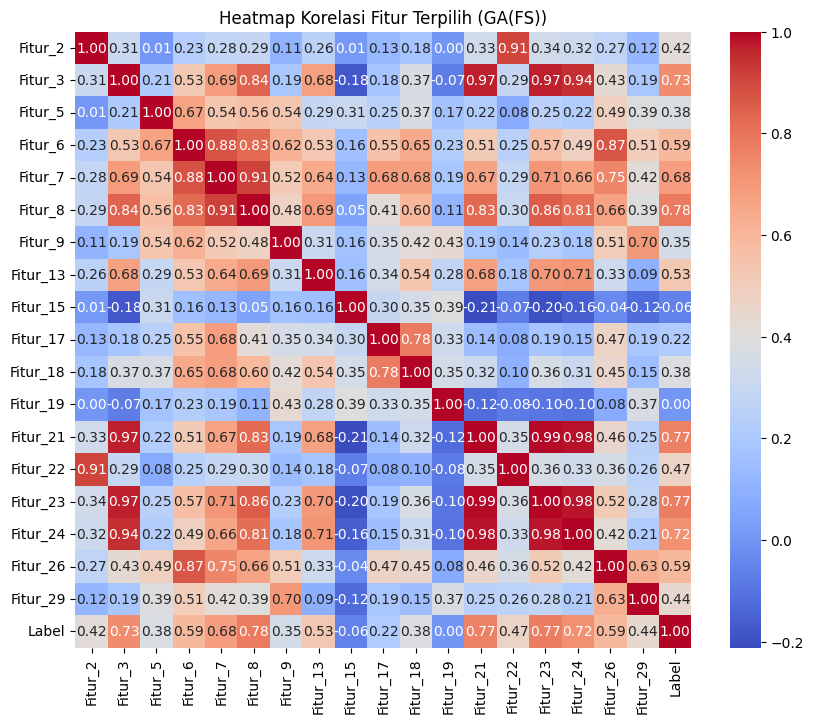

In [516]:
print("Visualisasi Fitur Terpilih (GA(FS))")
visualisasi_fitur_terpilih(X_train, fitur_mask_final, y_train, 'GA(FS)')

In [517]:
def pso_hyperparameter(X, y, fitur_mask, num_particles=30, max_iter=50, w=0.5, c1=2, c2=0.5):
    dim = 2
    particles = [np.random.uniform(0, 1, dim) for _ in range(num_particles)]
    velocities = [np.zeros(dim) for _ in range(num_particles)]
    p_best = particles.copy()
    p_best_scores = []

    for p in p_best:
        k = int(np.clip(p[0]*15, 3, 15))
        metric = 'euclidean' if p[1] < 0.5 else 'manhattan'
        X_sel = X[:, fitur_mask]
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_sel, y)
        y_pred = knn.predict(X_sel)
        p_best_scores.append(accuracy_score(y, y_pred))

    g_best = p_best[np.argmax(p_best_scores)]
    akurasi_per_iterasi = []

    for iter in range(max_iter):
        for i in range(num_particles):
            r1, r2 = np.random.rand(), np.random.rand()
            velocities[i] = (
                w * velocities[i] +
                c1 * r1 * (p_best[i] - particles[i]) +
                c2 * r2 * (g_best - particles[i])
            )
            particles[i] += velocities[i]
            particles[i] = np.clip(particles[i], 0, 1)
            k = int(np.clip(particles[i][0]*15, 3, 15))
            metric = 'euclidean' if particles[i][1] < 0.5 else 'manhattan'
            X_sel = X[:, fitur_mask]
            knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
            knn.fit(X_sel, y)
            y_pred = knn.predict(X_sel)
            score = accuracy_score(y, y_pred)
            if score > p_best_scores[i]:
                p_best[i] = particles[i]
                p_best_scores[i] = score
        g_best = p_best[np.argmax(p_best_scores)]
        best_score = max(p_best_scores)
        akurasi_per_iterasi.append(best_score)
        print(f'PSO-HP - Iterasi {iter+1}, Akurasi Terbaik: {best_score:.4f}')

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_iter+1), akurasi_per_iterasi, marker='o', color='orange', label='PSO (Hyperparameter)')
    plt.xlabel('Iterasi')
    plt.ylabel('Akurasi KNN (Training)')
    plt.title('Perkembangan Akurasi PSO (Hyperparameter)')
    plt.grid(True)
    plt.legend()
    plt.show()

    return g_best

PSO-HP - Iterasi 1, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 2, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 3, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 4, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 5, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 6, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 7, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 8, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 9, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 10, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 11, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 12, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 13, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 14, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 15, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 16, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 17, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 18, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 19, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 20, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 21, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 22, Akurasi Terbaik: 0.9846
PSO-HP - Iterasi 23

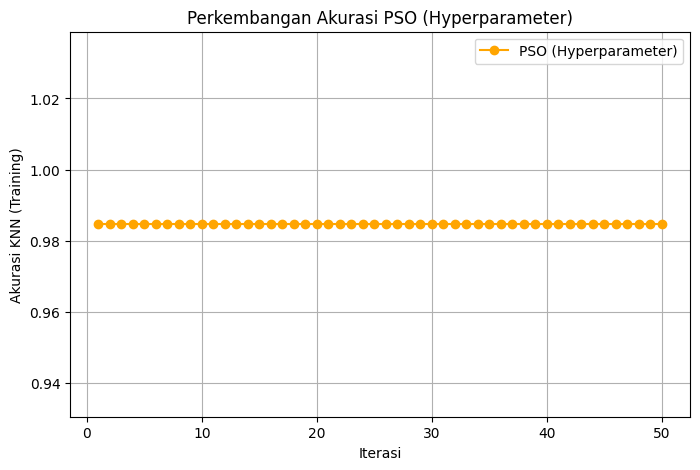


PSO (Hyperparameter) - k: 3, metric: manhattan

Evaluasi GA (Feature Selection) + PSO (Hyperparameter) + KNN
Akurasi GA (FS) + PSO (HP) + KNN: 0.9561
Presisi GA (FS) + PSO (HP) + KNN: 0.9524
Recall GA (FS) + PSO (HP) + KNN: 0.9302
F1-Score GA (FS) + PSO (HP) + KNN: 0.9412


In [518]:
best_hyper_ind = pso_hyperparameter(X_train, y_train, fitur_mask_final)
k_final = int(np.clip(best_hyper_ind[0]*15, 3, 15))
metric_final = 'euclidean' if best_hyper_ind[1] < 0.5 else 'manhattan'

print(f"\nPSO (Hyperparameter) - k: {k_final}, metric: {metric_final}")

akurasi_ga_pso, precision_ga_pso, recall_ga_pso, f1_ga_pso = evaluasi(X_train, y_train, X_test, y_test, fitur_mask_final, k_final, metric_final, "GA (FS) + PSO (HP) + KNN")

print("\nEvaluasi GA (Feature Selection) + PSO (Hyperparameter) + KNN")
print(f"Akurasi GA (FS) + PSO (HP) + KNN: {akurasi_ga_pso:.4f}")
print(f"Presisi GA (FS) + PSO (HP) + KNN: {precision_ga_pso:.4f}")
print(f"Recall GA (FS) + PSO (HP) + KNN: {recall_ga_pso:.4f}")
print(f"F1-Score GA (FS) + PSO (HP) + KNN: {f1_ga_pso:.4f}")

In [519]:
print("\nEvaluasi Final di Test Set\n")

print("Evaluasi GA + KNN")
print(f"Akurasi GA: {akurasi_ga:.4f}")
print(f"Presisi GA: {precision_ga:.4f}")
print(f"Recall GA: {recall_ga:.4f}")
print(f"F1-Score GA: {f1_ga:.4f}")

print("\nEvaluasi PSO + KNN")
print(f"Akurasi PSO: {akurasi_pso:.4f}")
print(f"Presisi PSO: {precision_pso:.4f}")
print(f"Recall PSO: {recall_pso:.4f}")
print(f"F1-Score PSO: {f1_pso:.4f}")

print("\nEvaluasi GA (Feature Selection) + PSO (Hyperparameter) + KNN")
print(f"Akurasi GA (FS) + PSO (HP) + KNN: {akurasi_ga_pso:.4f}")
print(f"Presisi GA (FS) + PSO (HP) + KNN: {precision_ga_pso:.4f}")
print(f"Recall GA (FS) + PSO (HP) + KNN: {recall_ga_pso:.4f}")
print(f"F1-Score GA (FS) + PSO (HP) + KNN: {f1_ga_pso:.4f}")


Evaluasi Final di Test Set

Evaluasi GA + KNN
Akurasi GA: 0.9561
Presisi GA: 0.9524
Recall GA: 0.9302
F1-Score GA: 0.9412

Evaluasi PSO + KNN
Akurasi PSO: 0.9737
Presisi PSO: 0.9762
Recall PSO: 0.9535
F1-Score PSO: 0.9647

Evaluasi GA (Feature Selection) + PSO (Hyperparameter) + KNN
Akurasi GA (FS) + PSO (HP) + KNN: 0.9561
Presisi GA (FS) + PSO (HP) + KNN: 0.9524
Recall GA (FS) + PSO (HP) + KNN: 0.9302
F1-Score GA (FS) + PSO (HP) + KNN: 0.9412
